In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 24.0MB/s]
100% 163M/163M [00:08<00:00, 20.5MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1449.jpg', 'with_mask_366.jpg', 'with_mask_3500.jpg', 'with_mask_1045.jpg', 'with_mask_1094.jpg']
['with_mask_1378.jpg', 'with_mask_3459.jpg', 'with_mask_1295.jpg', 'with_mask_3501.jpg', 'with_mask_1387.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3150.jpg', 'without_mask_3656.jpg', 'without_mask_2634.jpg', 'without_mask_222.jpg', 'without_mask_2839.jpg']
['without_mask_1494.jpg', 'without_mask_1442.jpg', 'without_mask_3248.jpg', 'without_mask_2376.jpg', 'without_mask_2183.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

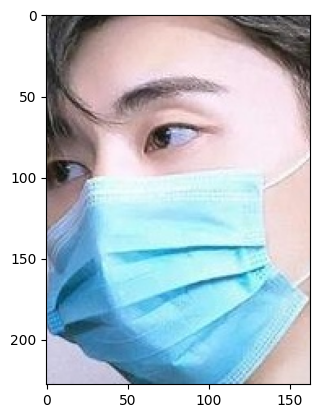

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

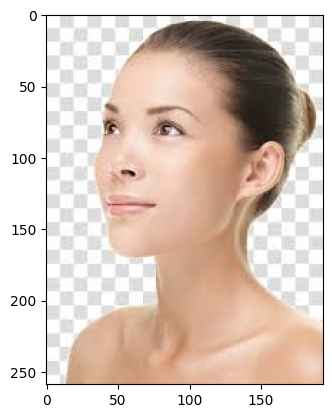

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[123,  90,  81],
        [124,  91,  82],
        [129,  98,  85],
        ...,
        [254, 245, 192],
        [254, 244, 190],
        [254, 245, 190]],

       [[121,  88,  79],
        [121,  89,  78],
        [121,  89,  75],
        ...,
        [253, 243, 190],
        [253, 243, 189],
        [253, 244, 189]],

       [[101,  69,  59],
        [ 99,  67,  53],
        [ 94,  62,  46],
        ...,
        [252, 243, 190],
        [252, 242, 189],
        [252, 242, 189]],

       ...,

       [[124,  99,  92],
        [124, 100,  91],
        [118,  94,  84],
        ...,
        [ 15,   1,   6],
        [ 19,   5,  10],
        [ 21,   6,  11]],

       [[119,  94,  87],
        [120,  96,  87],
        [120,  96,  86],
        ...,
        [ 13,   0,   4],
        [ 15,   0,   5],
        [ 16,   1,   6]],

       [[112,  86,  80],
        [105,  81,  72],
        [104,  80,  70],
        ...,
        [ 13,   0,   4],
        [ 16,   1,   6],
        [ 17,   2,   7]]], dtype=uint8)
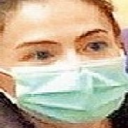

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 56,  56,  56],
        [ 56,  54,  52],
        [ 56,  52,  49],
        ...,
        [ 37,  32,  28],
        [ 43,  38,  35],
        [ 47,  43,  40]],

       [[ 56,  56,  56],
        [ 56,  54,  52],
        [ 56,  52,  49],
        ...,
        [ 37,  32,  28],
        [ 42,  38,  34],
        [ 46,  42,  39]],

       [[ 56,  56,  56],
        [ 56,  54,  52],
        [ 56,  52,  49],
        ...,
        [ 36,  31,  27],
        [ 41,  37,  33],
        [ 45,  41,  38]],

       ...,

       [[104, 103, 101],
        [104, 103, 101],
        [105, 104, 102],
        ...,
        [ 52,  52,  50],
        [ 69,  69,  67],
        [ 61,  61,  59]],

       [[100,  99,  97],
        [100,  99,  97],
        [101, 100,  98],
        ...,
        [ 66,  66,  64],
        [ 63,  63,  61],
        [ 38,  38,  36]],

       [[ 96,  95,  93],
        [ 98,  97,  95],
        [ 99,  98,  96],
        ...,
        [ 67,  67,  65],
        [ 45,  45,  43],
        [ 38,  38,  36]]], dtype=uint8)
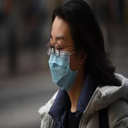

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0.21176471, 0.20392157],
        [0.21960784, 0.20392157, 0.19215686],
        ...,
        [0.14509804, 0.1254902 , 0.10980392],
        [0.16862745, 0.14901961, 0.1372549 ],
        [0.18431373, 0.16862745, 0.15686275]],

       [[0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0.21176471, 0.20392157],
        [0.21960784, 0.20392157, 0.19215686],
        ...,
        [0.14509804, 0.1254902 , 0.10980392],
        [0.16470588, 0.14901961, 0.13333333],
        [0.18039216, 0.16470588, 0.15294118]],

       [[0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0.21176471, 0.20392157],
        [0.21960784, 0.20392157, 0.19215686],
        ...,
        [0.14117647, 0.12156863, 0.10588235],
        [0.16078431, 0.14509804, 0.12941176],
        [0.17647059, 0.16078431, 0.14901961]],

       ...,

       [[0.40784314, 0.40392157, 0.39607843],
        [0.40784314, 0.40392157, 0.39607843],
        [0.41176471, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - acc: 0.6852 - loss: 0.6348 - val_acc: 0.9091 - val_loss: 0.2438
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8752 - loss: 0.3155 - val_acc: 0.9107 - val_loss: 0.2255
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9032 - loss: 0.2572 - val_acc: 0.9140 - val_loss: 0.1932
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9151 - loss: 0.2013 - val_acc: 0.9190 - val_loss: 0.1975
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9252 - loss: 0.1817 - val_acc: 0.9223 - val_loss: 0.1781


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9243 - loss: 0.2354
Test Accuracy = 0.9219059944152832


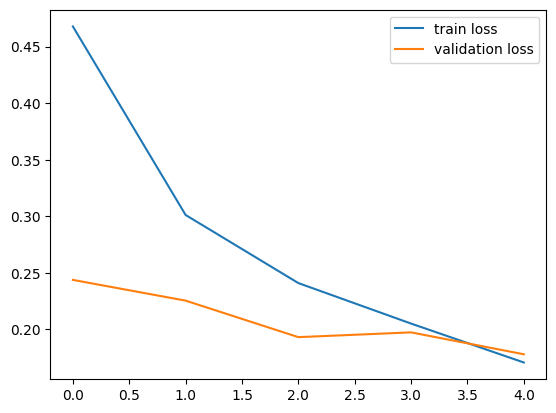

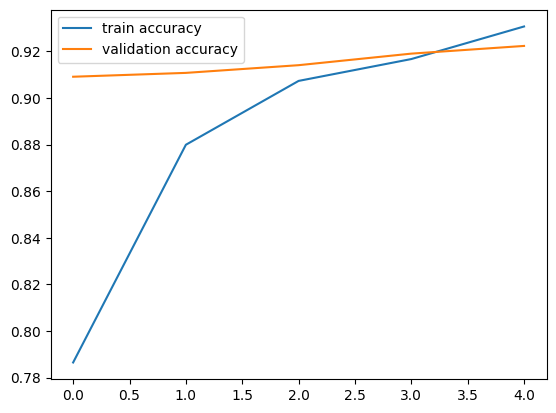

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


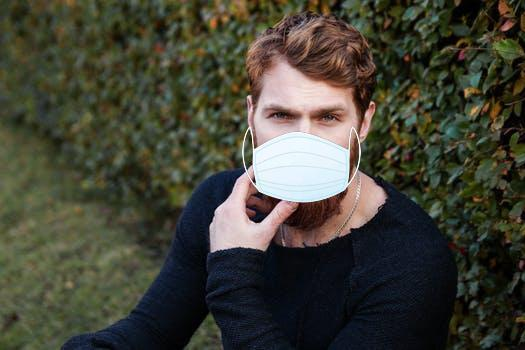

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
[[0.3104725  0.75629765]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1027.jpg


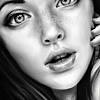

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.5376094  0.44479907]]
0
The person in the image is not wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
